# EDA of Yelp dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import sys
from nltk import Text, FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud
from time import time

In [2]:
sys.path.append('../../src/')
from proc_utils import string_concat

In [3]:
data_dir = '../../data/'
os.listdir(data_dir)

['review.csv']

In [4]:
t = time()
df = pd.read_csv(data_dir + 'review.csv')
elapsed = time() - t
print("----- DataFrame loaded"
      "\nin {0:.2f} seconds".format(elapsed) +
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(df.shape[0], df.shape[1]) +
      "\n-- Column names:\n", df.columns)

----- DataFrame loaded
in 65.15 seconds
with 6,685,900 rows
and 9 columns
-- Column names:
 Index(['stars', 'review_id', 'user_id', 'funny', 'text', 'date', 'useful',
       'cool', 'business_id'],
      dtype='object')


In [5]:
df.head()

,stars,review_id,user_id,funny,text,date,useful,cool,business_id
0,1.0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,1,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36,6,0,ujmEBvifdJM6h6RLv4wQIg
1,5.0,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33,0,0,NZnhc2sEQy3RmzKTZnqtwQ
2,5.0,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,0,I have to say that this office really has it t...,2016-11-09 20:09:03,3,0,WTqjgwHlXbSFevF32_DJVw
3,5.0,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38,0,0,ikCg8xy5JIg_NGPx-MSIDA
4,1.0,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38,7,0,b1b1eb3uo-w561D0ZfCEiQ


In [10]:
df['stars'].value_counts().sort_index()

1.0    1002159
2.0     542394
3.0     739280
4.0    1468985
5.0    2933082
Name: stars, dtype: int64

In [8]:
df['text_len'] = df['text'].str.len()
print("New column 'text_len' was added to the DataFrame.")

New column 'text_len' was added to the DataFrame.


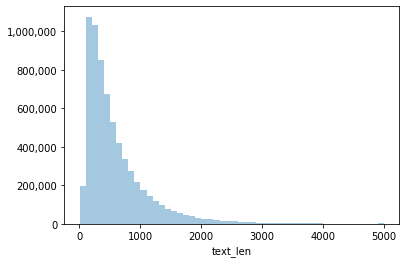

In [9]:
ax = sns.distplot(df['text_len'].dropna(), kde=False)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


In [10]:
mask1 = df['text_len'].isnull()
df[mask1]

,stars,review_id,user_id,funny,text,date,useful,cool,business_id,text_len
3427823,1.0,hpY467Acucmh3tCmEYGiDw,pUKAjAaSMkxiJ1WCIFSsBQ,2,NaN,2014-11-15 21:14:34,7,1,I7XWtKL1oHohZCtCCyQIog,NaN
6334066,3.0,iHdxK8lwkYn0rlNh-REuGQ,v3DIq18Z30KNwyUvBXtXEA,0,NaN,2014-12-26 08:32:06,0,0,oXoVJ0xKv82cBo9U6oEjlQ,NaN


In [11]:
df['user_id'].value_counts()

CxDOIDnH8gp9KXzpBHJYXw    4129
bLbSNkLggFnqwNNzzq-Ijw    2354
PKEzKWv_FktMm2mGPjwd0Q    1822
ELcQDlf69kb-ihJfxZyL0A    1764
DK57YibC5ShBmqQl97CKog    1727
                          ... 
ttHBOC4sTv_cOUZJJfHcRA       1
S2uRnaX19OoT4rntF_pK3A       1
QLI6eypbfX4OkcoaD3MbRA       1
Bnd-DgunIv1MGLh1rsPg7Q       1
lTZT23d7osxrJb5qiVm2-g       1
Name: user_id, Length: 1637138, dtype: int64

In [15]:
mask1 = df['text'].dropna().str.contains('http')
mask1.sum()

16024

In [19]:
df['text'].dropna()[mask1].iloc[0]

"Really great place. Went there on the advice of a friend, and now I'm a bit obsessed with Ron himself. \n\nSuch a character, and I mean that in the best sense of the word. He does great work, and always goes above and beyond. \n\nNot expensive at all, and your shoes come back looking perfect (actually, more than so). Got two heels replaced, and he even polished them up nicely before giving them back. \n\nSo taken with the experience that I wrote about Cecil's on my blog. (http://looksharpsconnie.blogspot.com/2012/05/cecil-shoe-doctor.html)"

1,002,159 records with a rating of 1.0 stars.
First 500 symbols in the  string:

Total bill for this horrible service? Over $8Gs. These crooks actually had the nerve to charge us $69 for 3 pills. I checked online the pills can be had for 19 cents EACH! Avoid Hospital ERs at all costs. Today was my second out of three sessions I had paid for. Although my first session went well, I could tell Meredith had a particular enjoyment for her male clients over her female. However, I returned because she did my teeth fine and I was pleased with the results. When I went in today, I was


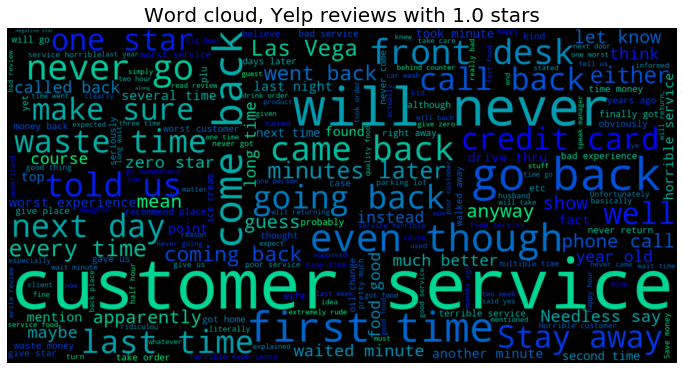

In [5]:
stars = 1.0

save_path = os.path.join('results', 'word_clouds')
if not os.path.exists(save_path):
    os.makedirs(save_path)

s = df.query("stars == @stars")
print("{0:,} records with a rating of {1} stars.".format(len(s), stars))

conc_string = string_concat(s['text'])

wordcloud = WordCloud(width=1600, height=800, max_font_size=200, 
                      colormap='winter').generate(conc_string)

f, ax = plt.subplots(1, figsize=(12,10))
ax.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
ax.set_title("Word cloud, Yelp reviews with {0} stars".format(stars), fontsize=20)

f.savefig(save_path + 'wordcloud_yelp_{0}stars.png'.format(stars), dpi=300)

542,394 records with a rating of 2.0 stars.
First 500 symbols in the  string:

I was really looking forward to visiting after having some of their beers. The "Man O'War" quickly became my favorite DIPA; the Rusulka Vanilla Stout is a good thick, sweet stout; and the Ironclad is a top notch IPA. 
The only big miss on their beers I've had is the Big Chuck Barleywine. It could probably benefit greatly with age, but at this age all there is to taste is the alcohol.  
Nonetheless, I had enough to convince me that the other beers I hadn't had from them would be top notch... and 


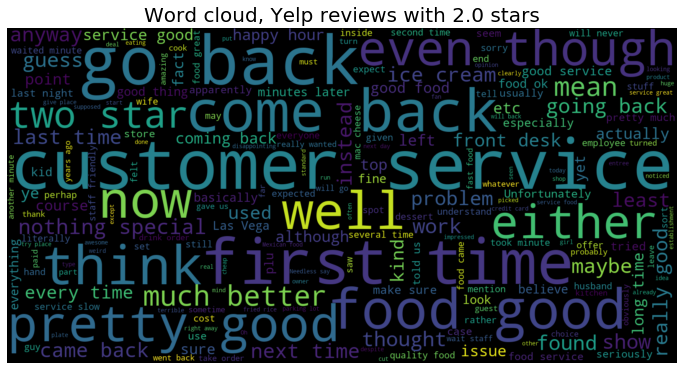

In [6]:
stars = 2.0

save_path = os.path.join('results', 'word_clouds')
if not os.path.exists(save_path):
    os.makedirs(save_path)

s = df.query("stars == @stars")
print("{0:,} records with a rating of {1} stars.".format(len(s), stars))

conc_string = string_concat(s['text'])

wordcloud = WordCloud(width=1600, height=800, max_font_size=200, 
                      colormap='viridis').generate(conc_string)

f, ax = plt.subplots(1, figsize=(12,10))
ax.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
ax.set_title("Word cloud, Yelp reviews with {0} stars".format(stars), fontsize=20)

f.savefig(save_path + 'wordcloud_yelp_{0}stars.png'.format(stars), dpi=300)

In [5]:
stars = 1.0
s = df.query("stars == @stars")
print("{0:,} records with a rating of {1} stars.".format(len(s), stars))

1,002,159 records with a rating of 1.0 stars.


739,280 records with a rating of 3.0 stars.
First 500 symbols in the  string:

Tracy dessert had a big name in Hong Kong and the one in First Markham place has been here for many years now! 

Came in for some Chinese dessert, and I must say their selection has increased tremendously over the years. I might as well add that the price has also increased tremendously as well. The waitress gave us tea, which I could taste had red date in it. Fancy!

A simple taro with coconut with tapioca pearls was like $5.25 or something. Basically all the desserts were more than $5. That's 


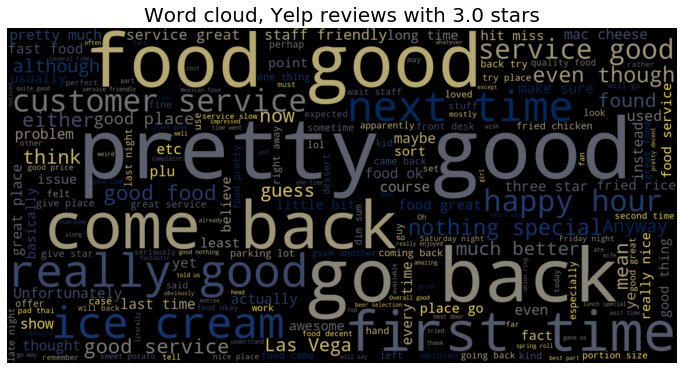

In [7]:
stars = 3.0

save_path = os.path.join('results', 'word_clouds')
if not os.path.exists(save_path):
    os.makedirs(save_path)

s = df.query("stars == @stars")
print("{0:,} records with a rating of {1} stars.".format(len(s), stars))

conc_string = string_concat(s['text'])

wordcloud = WordCloud(width=1600, height=800, max_font_size=200, 
                      colormap='cividis').generate(conc_string)

f, ax = plt.subplots(1, figsize=(12,10))
ax.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
ax.set_title("Word cloud, Yelp reviews with {0} stars".format(stars), fontsize=20)

f.savefig(save_path + 'wordcloud_yelp_{0}stars.png'.format(stars), dpi=300)

1,468,985 records with a rating of 4.0 stars.
First 500 symbols in the  string:

I'll be the first to admit that I was not excited about going to La Tavolta. Being a food snob, when a group of friends suggested we go for dinner I looked online at the menu and to me there was nothing special and it seemed overpriced.  Im also not big on ordering pasta when I go out. Alas, I was outnumbered. Thank goodness! I ordered the sea bass special. It was to die for. Cooked perfectly, seasoned perfectly, perfect portion. I can not say enough good things about this dish. When the server 


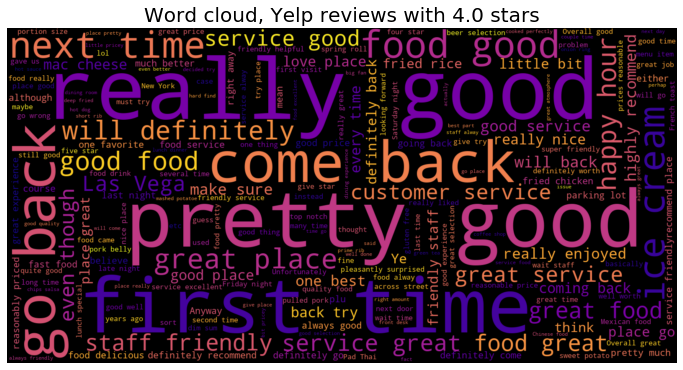

In [11]:
stars = 4.0

save_path = os.path.join('results', 'word_clouds')
if not os.path.exists(save_path):
    os.makedirs(save_path)

s = df.query("stars == @stars")
print("{0:,} records with a rating of {1} stars.".format(len(s), stars))

conc_string = string_concat(s['text'])

wordcloud = WordCloud(width=1600, height=800, max_font_size=200, 
                      colormap='plasma').generate(conc_string)

f, ax = plt.subplots(1, figsize=(12,10))
ax.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
ax.set_title("Word cloud, Yelp reviews with {0} stars".format(stars), fontsize=20)

f.savefig(save_path + 'wordcloud_yelp_{0}stars.png'.format(stars), dpi=300)

2,933,082 records with a rating of 5.0 stars.
First 500 symbols in the  string:

I *adore* Travis at the Hard Rock's new Kelly Cardenas Salon!  I'm always a fan of a great blowout and no stranger to the chains that offer this service; however, Travis has taken the flawless blowout to a whole new level!  

Travis's greets you with his perfectly green swoosh in his otherwise perfectly styled black hair and a Vegas-worthy rockstar outfit.  Next comes the most relaxing and incredible shampoo -- where you get a full head message that could cure even the very worst migraine in min


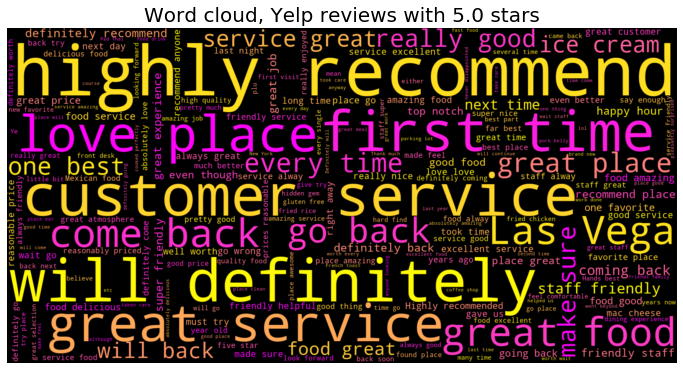

In [13]:
stars = 5.0

save_path = os.path.join('results', 'word_clouds')
if not os.path.exists(save_path):
    os.makedirs(save_path)

s = df.query("stars == @stars")
print("{0:,} records with a rating of {1} stars.".format(len(s), stars))

conc_string = string_concat(s['text'])

wordcloud = WordCloud(width=1600, height=800, max_font_size=200, 
                      colormap='spring').generate(conc_string)

f, ax = plt.subplots(1, figsize=(12,10))
ax.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
ax.set_title("Word cloud, Yelp reviews with {0} stars".format(stars), fontsize=20)

f.savefig(save_path + 'wordcloud_yelp_{0}stars.png'.format(stars), dpi=300)

## Transform text

### Create single corpus and tokenize text

In [5]:
def tokenizer(text):
    return text.split()
tokenizer('runners like running and thus they run')

['runners', 'like', 'running', 'and', 'thus', 'they', 'run']

In [6]:
stars = 1.0
s = df.query("stars == @stars")
print("{0:,} records with a rating of {1} stars.".format(len(s), stars))

1,002,159 records with a rating of 1.0 stars.


In [7]:
t = time()

corpus_string = string_concat(s['text'])
tokens = tokenizer(corpus_string)
elapsed = time() - t
print("Tokenization finished, took {0:,.2f} seconds ({1:,.2f} minutes), {2:,} tokens."
      .format(elapsed, elapsed / 60, len(tokens)))

First 500 symbols in the  string:

Total bill for this horrible service? Over $8Gs. These crooks actually had the nerve to charge us $69 for 3 pills. I checked online the pills can be had for 19 cents EACH! Avoid Hospital ERs at all costs. Today was my second out of three sessions I had paid for. Although my first session went well, I could tell Meredith had a particular enjoyment for her male clients over her female. However, I returned because she did my teeth fine and I was pleased with the results. When I went in today, I was
Tokenization finished, took 13.84 seconds (0.23 minutes), 143,467,514 tokens.


In [9]:
len(tokens)

143467514

In [10]:
tokens[:10]

['Total',
 'bill',
 'for',
 'this',
 'horrible',
 'service?',
 'Over',
 '$8Gs.',
 'These',
 'crooks']

### Create NLTK text from the list of tokens

In [8]:
text = Text(tokens)

## Generate randomized text

In [13]:
text.generate()

Building ngram index...


me & he gets that sandwich was actually happening and didn't have a
choice?? beer is suppose to be a better Dermatologist. It took 20
minutes after 4am and I got the Arizona State Bar. to give some
texture. and it's hours before our food I have YET to ever want to
know which veggies they got one manufacturer-authorized repair person
might need to know what happened to this Krispy Kreme donuts are if
that was the worst service I received only minimal sauce. happened and
the food was, and then brought us to ask me for my son and


"me & he gets that sandwich was actually happening and didn't have a\nchoice?? beer is suppose to be a better Dermatologist. It took 20\nminutes after 4am and I got the Arizona State Bar. to give some\ntexture. and it's hours before our food I have YET to ever want to\nknow which veggies they got one manufacturer-authorized repair person\nmight need to know what happened to this Krispy Kreme donuts are if\nthat was the worst service I received only minimal sauce. happened and\nthe food was, and then brought us to ask me for my son and"

## Context analysis

In [17]:
text.concordance('worst')

Displaying 25 of 131979 matches:
erstaffed or the staff was slow. The worst part of it was that the service. The
s morning, or just have the absolute worst attitudes you've ever seen in human 
eived. It certainly tops the list as worst interaction/confrontation with a str
lso steer clear. Best example of the worst service. 2-3 years ago I found LifeS
ul dish, the pho I had today was the worst thing ever. My parents came to visit
hey should inform the customers. The worst part was watching tables come in bef
 it will be buried beneath the rest. Worst service ever. Only one here and took
n would stop using them. This is the worst gym I've ever been to, and I've grow
hank goodness. Not veteran friendly. Worst experience ever.... I guess it's my 
treet to Sally's. Quite possibly the worst meal I have had in ages. The service
 place, I'm scared of this food. The worst part is the service and the trashy, 
ence I just had. Centurylink has the WORST customer service I've ever experienc
n talke

In [18]:
text.similar('bagel')

and the but food pizza i that one in this so a was for service or it
to is not


## Lexical diversity

In [12]:
print("{0:,} tokens in total".format(len(text)))

143,467,514 tokens in total


In [14]:
print("{0:,} unique tokens".format(len(set(text))))

1,409,377 unique tokens


In [15]:
print("unique / total = {0:,.2f}% ".format(len(set(text)) / len(text) * 100))

unique / total = 0.98% 


## Term frequency distribution

In [18]:
fdist = FreqDist(text)
print(fdist)

<FreqDist with 1409377 samples and 143467514 outcomes>


In [21]:
fdist.most_common(50)

[('the', 5663362),
 ('to', 4309844),
 ('and', 4304564),
 ('I', 4184449),
 ('a', 3064200),
 ('was', 2424768),
 ('of', 1758974),
 ('for', 1598318),
 ('my', 1463172),
 ('in', 1457684),
 ('that', 1412029),
 ('it', 1249879),
 ('they', 1181470),
 ('is', 1148829),
 ('not', 1040574),
 ('this', 980598),
 ('on', 953409),
 ('with', 939361),
 ('have', 907544),
 ('we', 879986),
 ('at', 815963),
 ('had', 813670),
 ('The', 800944),
 ('me', 788226),
 ('you', 778124),
 ('but', 723973),
 ('were', 690396),
 ('be', 678181),
 ('so', 532084),
 ('would', 500917),
 ('are', 487524),
 ('get', 484257),
 ('our', 469874),
 ('out', 466232),
 ('as', 443794),
 ('he', 440483),
 ('she', 434083),
 ('just', 433096),
 ('there', 423250),
 ('no', 422300),
 ('from', 420455),
 ('an', 410560),
 ('up', 410379),
 ('if', 401792),
 ('We', 392981),
 ('or', 388509),
 ('like', 385401),
 ('one', 382230),
 ('when', 380551),
 ('about', 375892)]

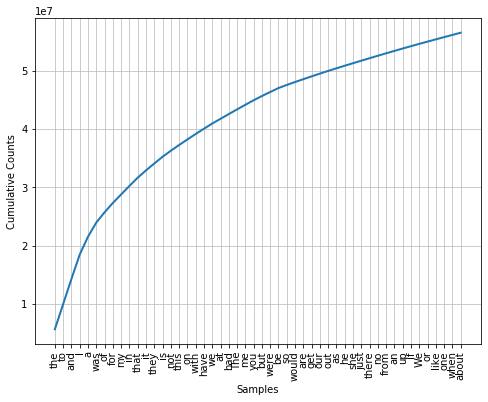

In [28]:
plt.figure(figsize=(8, 6))
fdist.plot(50, cumulative=True);

## Remove stop words

In [5]:
stop = stopwords.words('english')

In [7]:
def tokenizer_sw(text):
    return [w for w in text.split() if w not in stop]
tokenizer_sw('runners like running and thus they run')

['runners', 'like', 'running', 'thus', 'run']

In [11]:
stars = 1.0
s = df.query("stars == @stars")
print("{0:,} records with a rating of {1} stars.".format(len(s), stars))

1,002,159 records with a rating of 1.0 stars.


In [13]:
t = time()

corpus_string = string_concat(s['text'])
tokens = tokenizer_sw(corpus_string)
elapsed = time() - t
print("Tokenization finished, took {0:,.2f} seconds ({1:,.2f} minutes), {2:,} tokens."
      .format(elapsed, elapsed / 60, len(tokens)))

First 500 symbols in the  string:

Total bill for this horrible service? Over $8Gs. These crooks actually had the nerve to charge us $69 for 3 pills. I checked online the pills can be had for 19 cents EACH! Avoid Hospital ERs at all costs. Today was my second out of three sessions I had paid for. Although my first session went well, I could tell Meredith had a particular enjoyment for her male clients over her female. However, I returned because she did my teeth fine and I was pleased with the results. When I went in today, I was
Tokenization finished, took 392.00 seconds (6.53 minutes), 82,547,799 tokens.


In [15]:
text = Text(tokens)

## Lexical diversity

In [18]:
print("{0:,} tokens in total".format(len(text)))

82,547,799 tokens in total


In [17]:
print("{0:,} unique tokens".format(len(set(text))))

1,409,203 unique tokens


## Term frequency distribution

In [20]:
fdist = FreqDist(text)
print(fdist)

<FreqDist with 1409203 samples and 82547799 outcomes>


In [21]:
fdist.most_common(50)

[('I', 4184449),
 ('The', 800944),
 ('would', 500917),
 ('get', 484257),
 ('We', 392981),
 ('like', 385401),
 ('one', 382230),
 ('told', 353642),
 ('back', 351086),
 ('said', 342925),
 ('place', 340208),
 ('time', 340087),
 ('even', 332582),
 ('food', 326072),
 ('They', 311336),
 ('us', 303005),
 ('go', 302161),
 ('never', 297955),
 ('service', 297227),
 ('got', 267848),
 ('This', 255318),
 ('asked', 253214),
 ('could', 250988),
 ('went', 215738),
 ('came', 211343),
 ('It', 199726),
 ('My', 193409),
 ('going', 192414),
 ('order', 190331),
 ("I'm", 185462),
 ('minutes', 184862),
 ('called', 183319),
 ('people', 183147),
 ('good', 179168),
 ('customer', 178675),
 ('know', 178515),
 ('another', 173745),
 ('give', 168014),
 ('take', 167227),
 ('come', 165229),
 ('took', 163578),
 ('When', 162187),
 ('ordered', 158134),
 ('She', 157296),
 ('make', 157063),
 ('it.', 157026),
 ('He', 154856),
 ('still', 153104),
 ('-', 151486),
 ('call', 149913)]

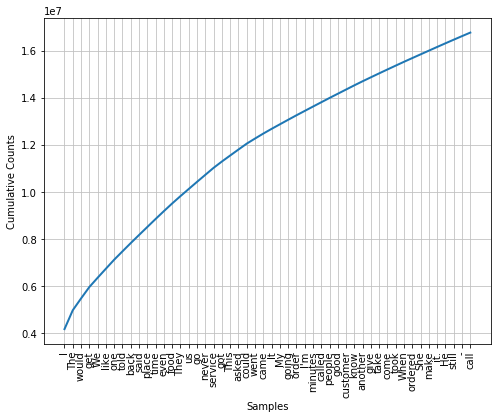

In [22]:
plt.figure(figsize=(8, 6))
fdist.plot(50, cumulative=True);